# Intermediate Statistic
created by Ari Sulistiyo Prabowo

This notebook is created to teach student about an advanced statistic. All the code is free to reuse by everyone.

# **Probability**
- Probability Mass Function
- Cumulative Distribution Function

# **Distribution**

# **Skewness**

# **Correlation**
____

In [ ]:
!pip install empiricaldist

In [ ]:
# import library
import pandas as pd
import numpy as np
from empiricaldist import Pmf, Cdf


import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# read the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv')
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


## Prabibility Mass Function

In [ ]:
# frequency
pmf_gender_fre = Pmf.from_seq(data['Gender'], normalize=False)
display(pmf_gender_fre)

# normalize
pmf_gender = Pmf.from_seq(data['Gender'])
pmf_gender

,probs
Female,88
Male,393


,probs
Female,0.182952
Male,0.817048


In [ ]:
pmf_gender = pmf_gender.sort_values()
pmf_data = pd.DataFrame({'Gender':pmf_gender.index, 'PMF':pmf_gender.values})

# visualization
px.bar(pmf_data, x='Gender', y="PMF", title = "PMF for Gender",
       width= 500, height=500)

## Cumulative Distribution Function

In [ ]:
# PMF before CDF
pmf_loan_amount = Pmf.from_seq(data['LoanAmount'])
pmf_loan_amount = pmf_loan_amount.sort_values()

# turn into dataframe
pmf_loan_data = pd.DataFrame({'Loan Amount':pmf_loan_amount.index, 
                              'PMF':pmf_loan_amount.values})

# visualization in bar
px.bar(pmf_loan_data, x='Loan Amount', y='PMF', title = "PMF for Loan Amount", width= 500, height=500)

In [ ]:
cdf_loan_amount = Cdf.from_seq(data['LoanAmount'])
cdf_loan_amount = cdf_loan_amount.sort_values()

# turn into dataframe
cdf_data = pd.DataFrame({'Loan Amount':cdf_loan_amount.index, 'CDF':cdf_loan_amount.values})
cdf_data

#visualization
px.line(cdf_data, y='CDF', x='Loan Amount', title = "CDF for Loan Amount", 
        width= 500, height=500)

## Normal Distribution

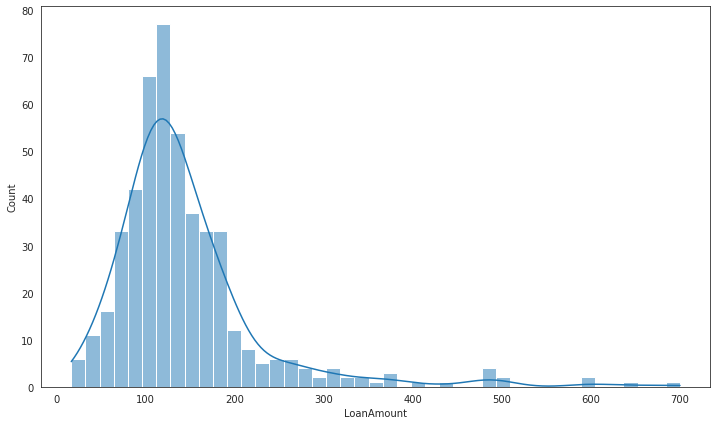

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(data=data, x='LoanAmount', kde=True)
plt.show()

## Skewness

In [ ]:
def skewness(x):
  from scipy.stats import skewnorm
  from scipy import stats
  import matplotlib.pyplot as plt

  numValues = 10000
  maxValue = 100
  skewness = x  #Negative values are left skewed, positive values are right skewed.

  random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

  random = random - min(random)      #Shift the set so the minimum value is equal to zero.
  random = random / max(random)      #Standadize all the vlues between 0 and 1. 
  random = random * maxValue         #Multiply the standardized values by the maximum value.

  mode = stats.mode(random)
  #Plot histogram to check skewness
  plt.hist(random,30,density=True, color = 'green', alpha=0.1)


  plt.show()

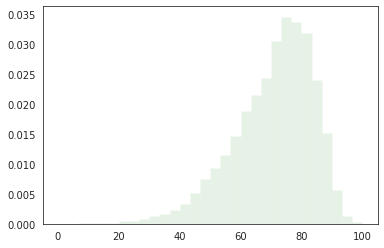

In [ ]:
# right skewness
skewness(x=-5)

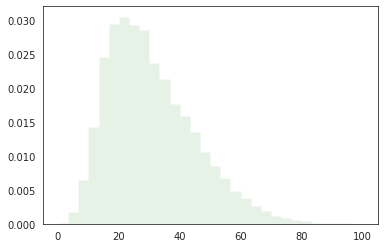

In [ ]:
# left skewness
skewness(x=5)

## Correlation

Does the loan amount has a good relationship with Applicant Income?

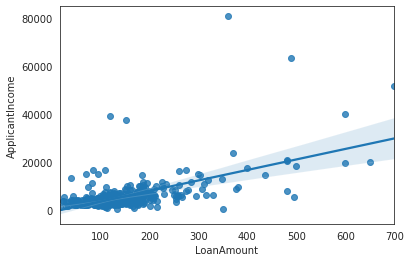

In [ ]:
sns.regplot(data=data, x='LoanAmount', y='ApplicantIncome')
plt.show()

Does the Loan_Amount_Term has a good relationship with Applicant Income?

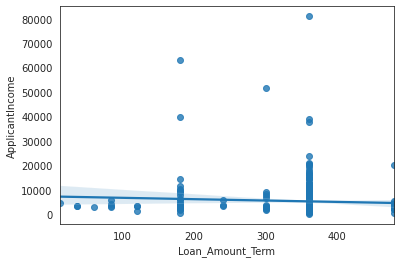

In [ ]:
sns.regplot(data=data, x='Loan_Amount_Term', y='ApplicantIncome')
plt.show()

Show all correlation 

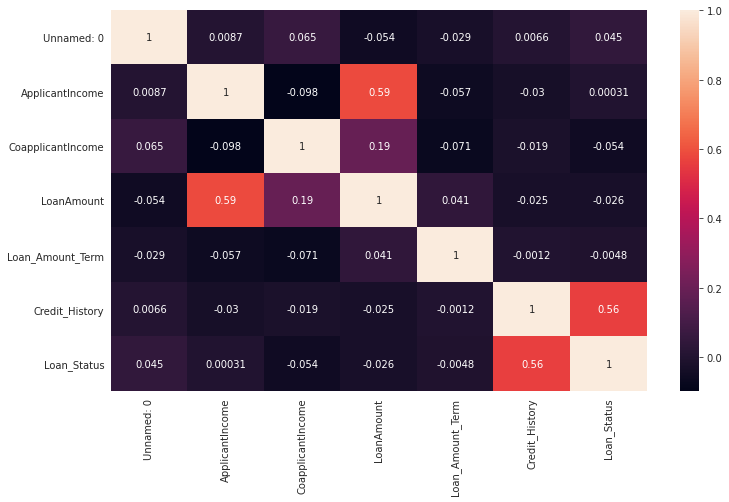

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Statistical Plot

In [ ]:
data_2 = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Chernobyle_chemical_radiation.csv")
data_2

,Unnamed: 0,PAYS,Code,Location,Longitude,Latitude,Date,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
0,0,SE,1,RISOE,12.07,55.7,86/04/27,1.00000,0.00000,0.24000
1,1,SE,1,RISOE,12.07,55.7,86/04/28,0.00460,0.00054,0.00098
2,2,SE,1,RISOE,12.07,55.7,86/04/29,0.01470,0.00430,0.00740
3,3,SE,1,RISOE,12.07,55.7,86/04/29,0.00061,0.00000,0.00009
4,4,SE,1,RISOE,12.07,55.7,86/04/30,0.00075,0.00010,0.00028
...,...,...,...,...,...,...,...,...,...,...
1877,2046,HU,24,BUDAPEST,19.10,47.5,86/05/07,3.70000,0.58000,1.20000
1878,2047,HU,24,BUDAPEST,19.10,47.5,86/05/08,2.20000,0.33000,0.69000
1879,2048,HU,24,BUDAPEST,19.10,47.5,86/05/09,0.75000,0.14000,0.29000
1880,2049,HU,24,BUDAPEST,19.10,47.5,86/05/10,0.05400,0.00600,0.00900


###Bar Chart

In [ ]:
data_2_l = data_2[data_2['Location'].str.contains('RISOE|BUDAPEST|STOCKHOLM|ISPRA')]

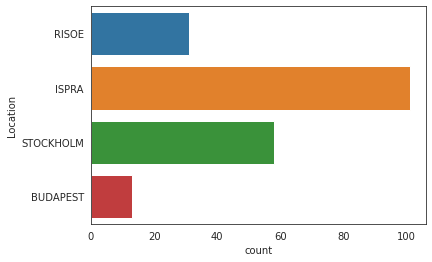

In [ ]:
# it is used for categorical
sns.countplot(data=data_2_l, y='Location')

###Scatter

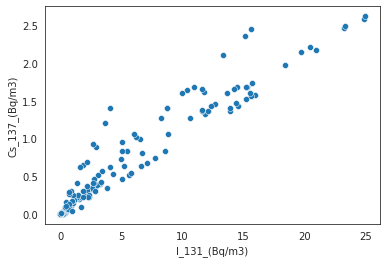

In [ ]:
# it is used only numerical
sns.scatterplot(data=data_2_l, x='I_131_(Bq/m3)', y='Cs_137_(Bq/m3)')

### Histogram

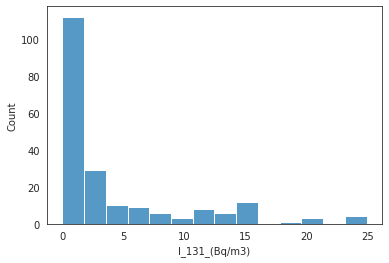

In [ ]:
# it is used only numerical
sns.histplot(data=data_2_l, x="I_131_(Bq/m3)")

### Boxplot

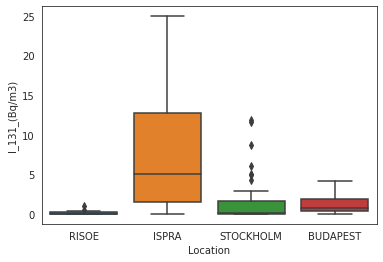

In [ ]:
# it is used for numerical and categorical
sns.boxplot(data=data_2_l, x='Location', y='I_131_(Bq/m3)')

### Heatmap + Correlation

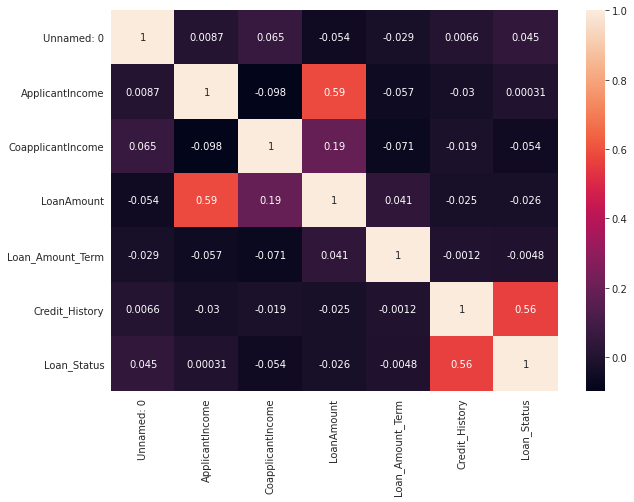

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)